In [1]:
#Analysing the data from no show appointments using python

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
sns.set_style('darkgrid') #plot style
#plot inline with notebook
%matplotlib inline 

In [4]:
#Data Wrangling - load, display, check and analyse for any duplicates and missing values in data set

#Load the dataset and check the columns from the file

df = pd.read_csv('noshowappointments.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#print the shape of the data
print(df.shape)
pd.DataFrame(df.dtypes)

(110527, 14)


,0
PatientId,float64
AppointmentID,int64
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,int64
Neighbourhood,object
Scholarship,int64
Hipertension,int64
Diabetes,int64


In [6]:
#statistics of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#check any missing values
df.info()
df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [8]:
#can be concluded that there's no missing value from above

In [9]:
#check for duplicates
df.duplicated().any()

False

In [10]:
#Insights gained from data wrangling
#1. Dataset doesn't have any duplicates or missing values
#2. data types of some columns should be corrected (like date etc.,)
#3. no-show (target column) can be converted to int (0 or 1) for better understanding

In [11]:
#Data cleaning - drop/add columns according to relevancy and change data types 

In [12]:
#drop irrelevant columns
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#change column names (to lower case -all), correct no-show column name
df.columns=df.columns.str.lower().str.replace('-','_')
pd.DataFrame(df.columns)
#Also ocrrect spelling for hipertension --> hypertension

,0
0,gender
1,scheduledday
2,appointmentday
3,age
4,neighbourhood
5,scholarship
6,hipertension
7,diabetes
8,alcoholism
9,handcap


In [14]:
#change data types for date columns
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['appointmentday']=pd.to_datetime(df['appointmentday'])

In [15]:
#change no-show column values to (1 or 0) and column name to show 
print(df.no_show.unique())
df.no_show=df.no_show.map({'No':1,'Yes':0})
df.rename(columns={'no_show':'show'},inplace=True)
print(df.show.unique())
df.head()

['No' 'Yes']
[1 0]


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [76]:
# create a new column for days difference between scheduling and appointment
diff=(df.appointmentday.dt.date-df.scheduledday.dt.date)
day_diff=(pd.to_timedelta(diff)).dt.days
df.insert(3,'day_diff',day_diff)
df.day_diff.dtype

dtype('int64')

In [77]:
#check the data after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110527 non-null  object             
 1   scheduledday    110527 non-null  datetime64[ns, UTC]
 2   appointmentday  110527 non-null  datetime64[ns, UTC]
 3   day_diff        110527 non-null  int64              
 4   age             110527 non-null  int64              
 5   neighbourhood   110527 non-null  object             
 6   scholarship     110527 non-null  int64              
 7   hipertension    110527 non-null  int64              
 8   diabetes        110527 non-null  int64              
 9   alcoholism      110527 non-null  int64              
 10  handcap         110527 non-null  int64              
 11  sms_received    110527 non-null  int64              
 12  show            110527 non-null  int64              
dtypes: datetime64[

In [78]:
#After cleaning the data, analysis can be a smoother process to check the correlation between different columns and show column

In [79]:
#Data Analysis

In [80]:
#function to check the ratio of show in each category
def plot_rat(x):
    df.groupby(x).show.mean().plot(kind='bar',
                                    edgecolor='black',
                                    figsize=(14,8)).set_ylabel('Ratio of show');
    display(df.groupby(x)[['show']].mean())

In [81]:
#statistics of the data
df.describe()

,day_diff,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,10.183702,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,15.254996,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-6.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


Percentage of patients who didn't show up for their appointment is 20.19 %


,show
show,
0,22319
1,88208


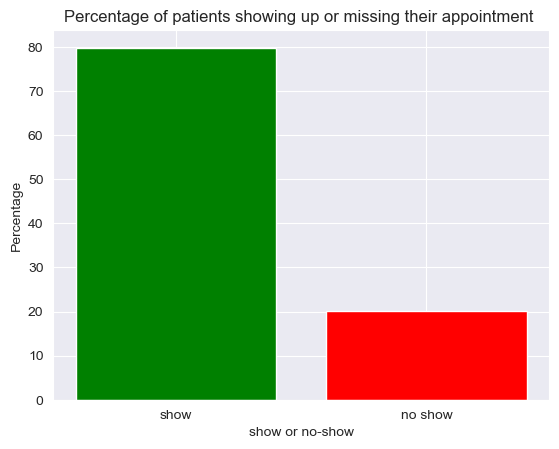

In [83]:
#get the percentage of show and no show
print(f"Percentage of patients who didn't show up for their appointment is { round((1-df.show.mean())*100,2) } %" )
no_show=len(df[df.show==0])/len(df.show)
show=len(df[df.show==1])/len(df.show)
plt.bar(['show','no show'],[show*100,no_show*100],color=['g','r']);
plt.title('Percentage of patients showing up or missing their appointment ');
plt.ylabel('Percentage');
plt.xlabel('show or no-show');
display(df.groupby('show')[['show']].count())

In [85]:
#analysing factors that influence the patients for show/no show
show=(df.show == 1)
no_show=(df.show == 0)
total_miss=len(df[no_show])
total=len(df)

percentage of Females and Males who missed their appointment:


,count
gender,
F,13.204013
M,6.989242


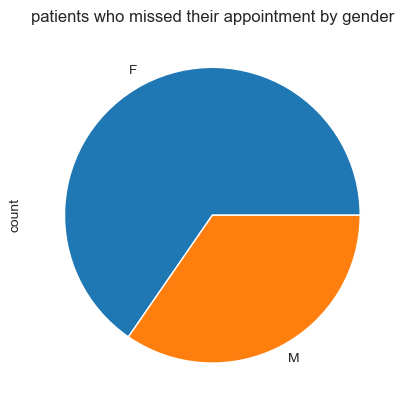

In [86]:
#retreive analytics based on gender
no_show_gender=df[no_show]['gender'].value_counts()
no_show_gender.plot(kind='pie');
plt.title('patients who missed their appointment by gender');
print('percentage of Females and Males who missed their appointment:')
pd.DataFrame(no_show_gender*100/total)

Text(0, 0.5, 'number of patients')

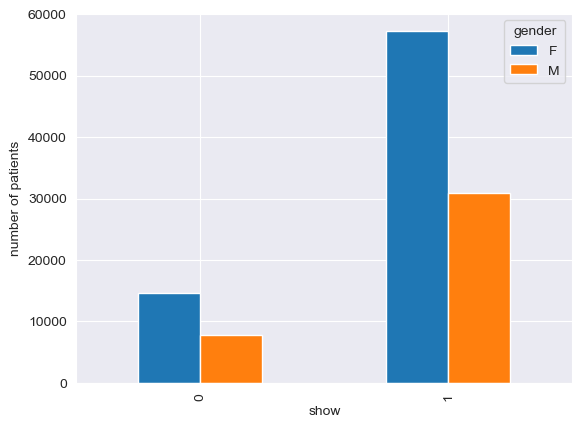

In [87]:
df.groupby(['gender','show']).size().unstack('gender').plot(kind='bar').set_ylabel('number of patients')

In [88]:
#Insights from this analysis
#Females tend to miss the appoitment more when compared to males

,show
scholarship,
0,0.801928
1,0.762637


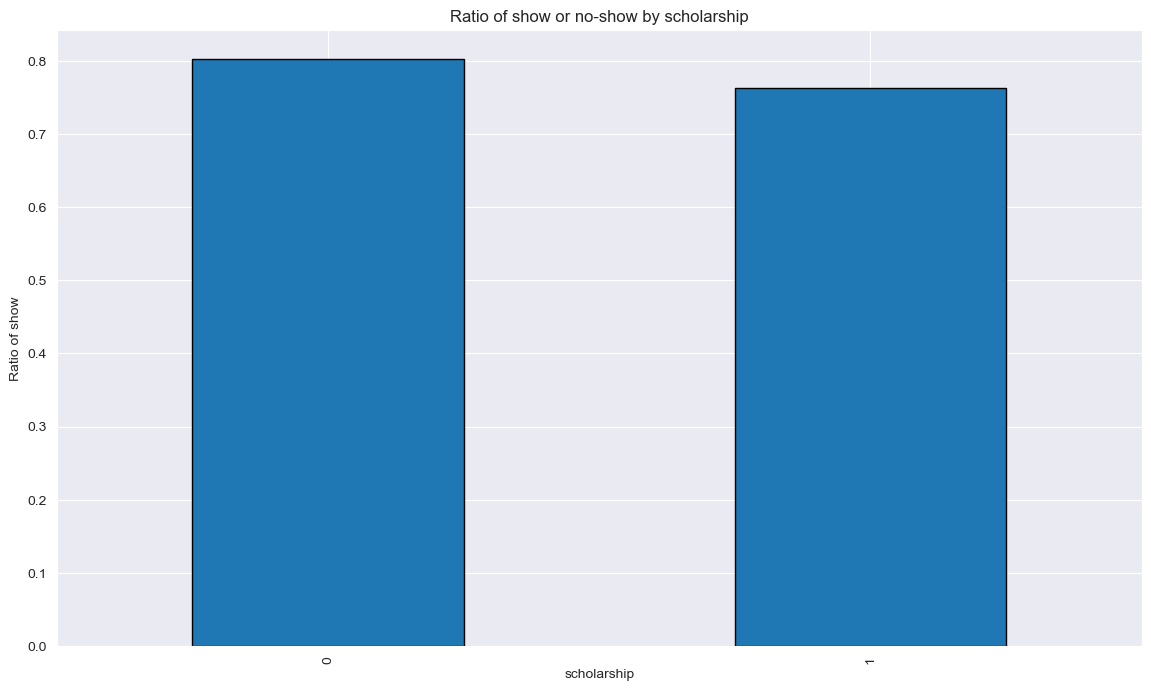

In [89]:
#retreiving analytics based on scholarship
plot_rat(df.scholarship)
plt.title('Ratio of show or no-show by scholarship');

In [90]:
#Insight -- patients with scholarship tend to miss more when to compared to others

,show
hipertension,
0,0.790963
1,0.826980


Text(0.5, 1.0, 'Ratio of show or no-show by scholarship')

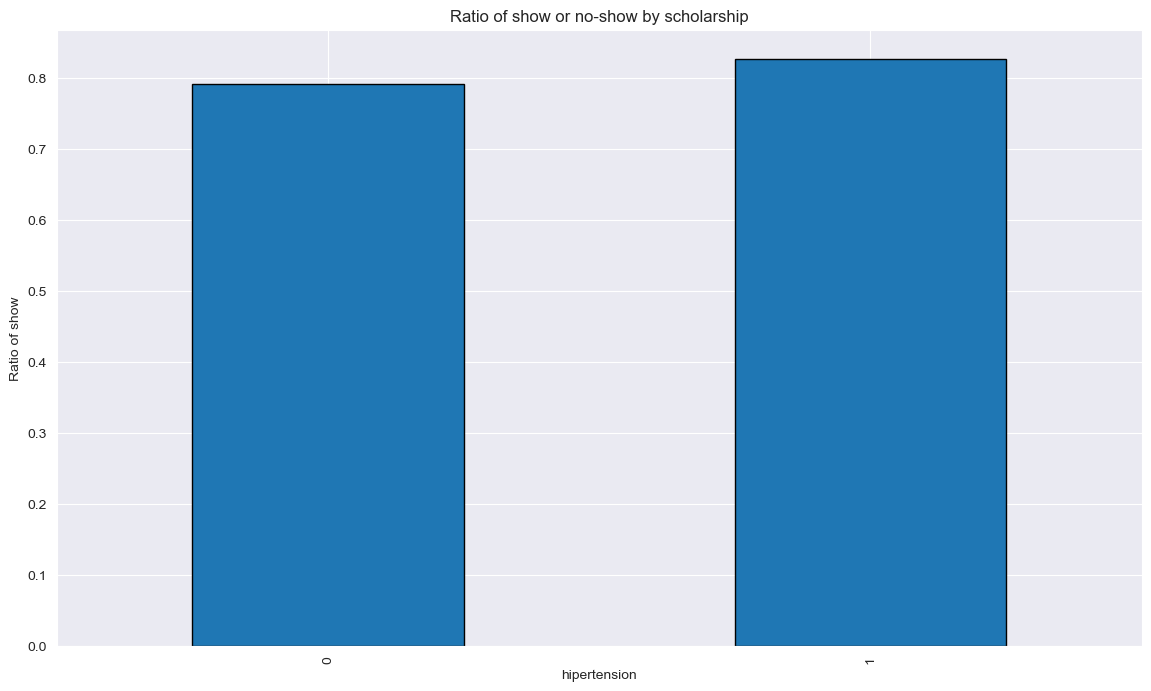

In [93]:
#retreiving analytics based on hypertension
plot_rat(df.hipertension)
plt.title('Ratio of show or no-show by scholarship')

In [94]:
#Insight --> people with hypertension likely show up than other

,show
sms_received,
0,0.832967
1,0.724255


Text(0.5, 1.0, 'Ratio of show or no-show by sms_received')

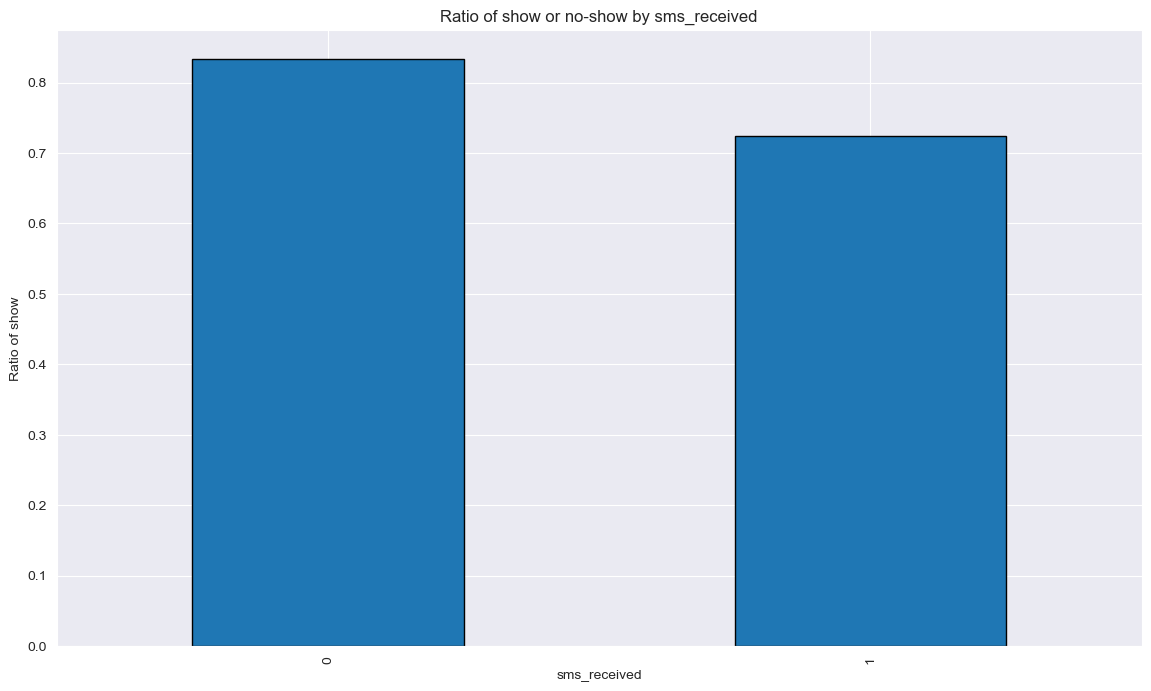

In [95]:
#retreiving analytics based on sms
plot_rat(df.sms_received)
plt.title('Ratio of show or no-show by sms_received')

In [96]:
#Insight -- people who did not receive sms are more likely to miss their appointment

the propotion of different time difference for patients who missed their appiontments:


,count
day_diff2,
more_than_15,38.460505
more_than_4,32.922622
fewdays,20.565438
sameday,8.029034


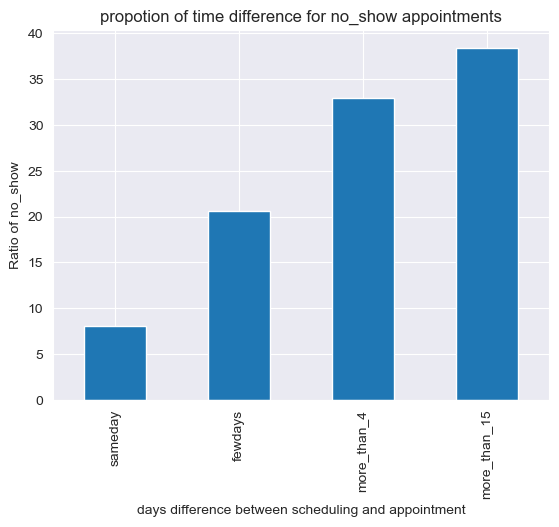

In [99]:
#retreving analytics based on time difference between schedule day and appointment day

#filter for positive day difference
df1=df[df.day_diff>=0]
#turn day diff into categorical column Day_diff2
bin_edges=[-1,0,4,15,179]
names=['sameday','fewdays','more_than_4','more_than_15']
df['day_diff2']=pd.cut(df1.day_diff,bin_edges,labels=names)

#filter for no-show records and count values for each category of day_diff2
no_show_day_diff=df[no_show].day_diff2.value_counts()/len(df[no_show])*100
no_show_day_diff.reindex(names).plot(kind='bar');
plt.title('propotion of time difference for no_show appointments');
plt.xlabel('days difference between scheduling and appointment');
plt.ylabel('Ratio of no_show');
print('the propotion of different time difference for patients who missed their appiontments:')
pd.DataFrame(no_show_day_diff)

In [100]:
#Insight --> the longer the wait time is more likely patient wont show up

,age
count,22319.000000
mean,34.317667
std,21.965941
min,0.000000
25%,16.000000
50%,33.000000
75%,51.000000
max,115.000000


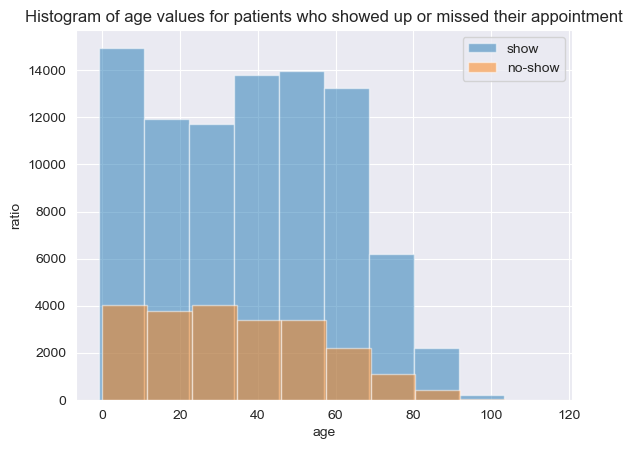

In [101]:
#retreiving analytics based on age

df[show].age.hist(alpha=0.5,label='show')
df[no_show].age.hist(alpha=0.5,label='no-show')
plt.legend()
plt.xlabel('age')
plt.ylabel('ratio')
plt.title('Histogram of age values for patients who showed up or missed their appointment')
df[no_show][['age']].describe()

In [103]:
#Insight -->exact correlation cannot be estimated between age and no show, 
#but younger pateints tend to miss their appointments more

In [105]:
#retreving analytics based on neighbourhood
rec_neigh=df['neighbourhood'].value_counts()
rec_neigh_no_show=df[no_show].neighbourhood.value_counts()
rec_neigh_no_show_percentage=rec_neigh_no_show/rec_neigh
pd.DataFrame(rec_neigh_no_show_percentage.sort_values(axis=0, ascending=False))

,count
neighbourhood,
ILHAS OCEÂNICAS DE TRINDADE,1.000000
SANTOS DUMONT,0.289185
SANTA CECÍLIA,0.274554
SANTA CLARA,0.264822
ITARARÉ,0.262664
...,...
SOLON BORGES,0.147122
MÁRIO CYPRESTE,0.145553
AEROPORTO,0.125000


In [106]:
#With the above analysis (based on different columns), we can conclude key insights as mentioned under each analysis
#dataset can be analysed and valuable insights can be drawn after overcoming certain data limitations 
# like -- negative date differences,additional relevant columns (vacation, time in exact hours, etc.,)